# **期末報告＿109702039**
以下內容是關於CNN進行數字辨識的嘗試

*  載入所需套件與資料

In [4]:
#載入套件
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os



*   將樣本資料、測試及、與訓練集上傳到雲端硬碟，透過google drive 進行資料讀取。(將資料放於附檔方便助教使用)

In [5]:
#同意連線到google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#確認資料的位置
warnings.filterwarnings('ignore')
print(os.listdir('/content/drive/MyDrive/colab_dta'))

['train.csv', 'test.csv', 'sample_submission.csv']


In [7]:
#檢視訓練集
train = pd.read_csv('/content/drive/MyDrive/colab_dta/train.csv')
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#檢視測試集
test = pd.read_csv('/content/drive/MyDrive/colab_dta/test.csv')
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#把label加入y_train當中
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis=1)
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


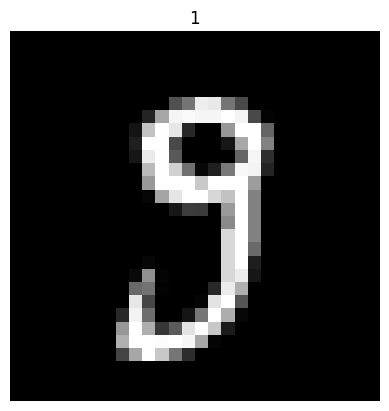

In [10]:
#以圖片顯示出訓練集中第40號的圖樣
img = X_train.iloc[40].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()



*   將資料進行normalization


In [11]:
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ", test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)




*   將資料reshape



In [12]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ", test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)




*   將資料轉變成one-hot encoding



In [13]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)



*    將訓練集與測試集按照9:1的比例分開。


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


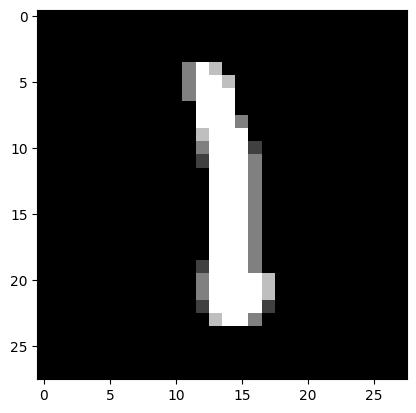

In [15]:
#顯示出訓練集中的範例
plt.imshow(X_train[5][:,:,0],cmap ='gray')
plt.show()

In [16]:
#載入建立model所需套件
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [17]:
#使用兩層的類神經網路，並使用relu已降低共線性
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',
                 activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0,25))

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = "softmax"))

In [18]:
#設定 optimizer learning rate 為0.001
optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)

In [19]:
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

In [20]:
#設定epochs 和batch_size
epochs = 10
batch_size = 300

In [21]:
#轉換訓練集的圖片避免overfitting
datagen = ImageDataGenerator(featurewise_center = False,
                             samplewise_center = False,
                             featurewise_std_normalization = False,
                             samplewise_std_normalization = False,
                             zca_whitening = False,
                             rotation_range = 5, #隨機旋轉5度
                             zoom_range = 0.1, #隨機放大10%
                             height_shift_range = 0.1, #隨機垂直移動10%
                             width_shift_range = 0.1, #隨機水平移動10%
                             horizontal_flip = False, #隨機翻轉圖樣
                             vertical_flip = False)
datagen.fit(X_train)

In [22]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/3
3780/3780 [==============================] - 73s 19ms/step - loss: 0.3814 - accuracy: 0.8766 - val_loss: 0.0955 - val_accuracy: 0.9729
Epoch 2/3
3780/3780 [==============================] - 70s 18ms/step - loss: 0.1736 - accuracy: 0.9471 - val_loss: 0.0663 - val_accuracy: 0.9783
Epoch 3/3
3780/3780 [==============================] - 70s 19ms/step - loss: 0.1444 - accuracy: 0.9564 - val_loss: 0.0550 - val_accuracy: 0.9850


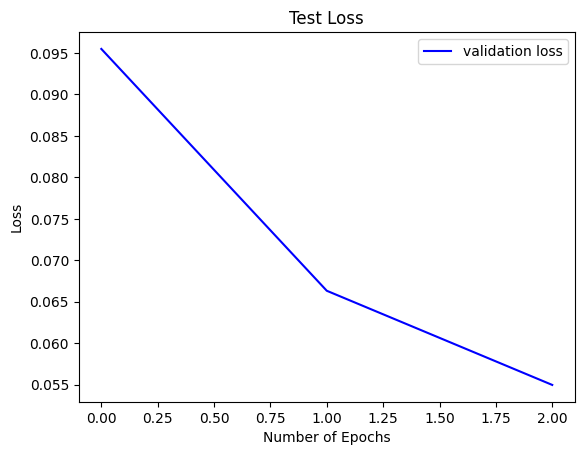

In [23]:
#檢視訓練結果
plt.plot(history.history['val_loss'],color='b',label ="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()